In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [119]:
df_cars=pd.read_csv("cars.csv")

In [120]:
df_cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [121]:
df_cars.set_index('Car_ID', inplace=True)

In [122]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              100 non-null    object
 1   Model              100 non-null    object
 2   Year               100 non-null    int64 
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 10.2+ KB


In [123]:
df_cars.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [124]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [125]:
for i in df_cars.select_dtypes('object').columns:
    df_cars[i] = encoder.fit_transform(df_cars[i])

df_cars.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Car_ID,,,,,,,,,,,,
1,9,15,2018,50000,1,1,0,15,1498,108,5,800000
2,3,14,2019,40000,1,0,1,17,1597,140,5,1000000
3,2,30,2017,20000,1,0,0,10,4951,395,4,2500000
4,6,42,2020,30000,0,1,2,23,1248,74,5,600000
5,4,41,2016,60000,0,0,1,18,1999,194,5,850000


In [126]:
df_cars['CarAge']=2024-df_cars['Year']
df_cars.drop(columns=['Year','Seats'])

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,CarAge
Car_ID,,,,,,,,,,,
1,9,15,50000,1,1,0,15,1498,108,800000,6
2,3,14,40000,1,0,1,17,1597,140,1000000,5
3,2,30,20000,1,0,0,10,4951,395,2500000,7
4,6,42,30000,0,1,2,23,1248,74,600000,4
5,4,41,60000,0,0,1,18,1999,194,850000,8
...,...,...,...,...,...,...,...,...,...,...,...
96,7,11,22000,0,0,0,16,1950,191,2900000,5
97,9,29,38000,0,1,1,13,2755,171,1400000,7
98,2,18,26000,1,1,2,18,1497,121,750000,6


In [127]:
import seaborn as sns

<Axes: >

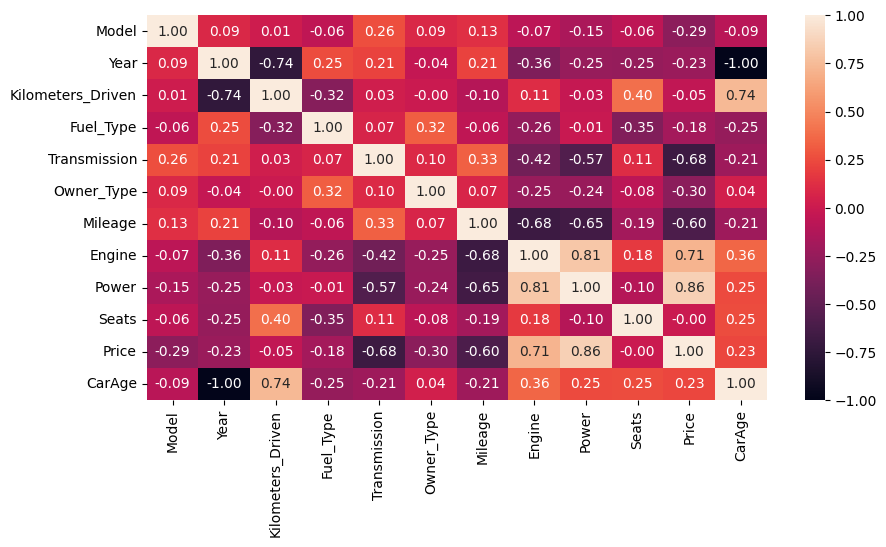

In [129]:
##Now checking for multi-collinearity
corr=df_cars.iloc[:,1:].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True, fmt='.2f', cmap='rocket', cbar=True)

Since none of the features are more than 90% correlated we will move ahead keeping all the columns.

In [130]:
##splitting the dataset
X=df_cars.drop(columns=['Price'])
y=df_cars['Price']

In [131]:
y.head()


Car_ID
1     800000
2    1000000
3    2500000
4     600000
5     850000
Name: Price, dtype: int64

In [132]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [133]:
X_scaled=scaler.fit_transform(X)

In [135]:
print(X_scaled)

[[ 1.19759354 -0.79589113 -0.33468073 ... -0.65458965 -0.30814935
   0.33468073]
 [-0.61237151 -0.85369005  0.52347499 ... -0.23673869 -0.30814935
  -0.52347499]
 [-0.91403235  0.07109267 -1.19283646 ...  3.09301119 -1.64792914
   1.19283646]
 ...
 [-0.91403235 -0.62249437 -0.33468073 ... -0.4848377  -0.30814935
   0.33468073]
 [-0.31071067  1.22707108  0.52347499 ... -0.58930044 -0.30814935
  -0.52347499]
 [ 0.8959327  -1.2582825   1.38163072 ... -0.95492003 -0.30814935
  -1.38163072]]


In [84]:
y.head()

Car_ID
1     800000
2    1000000
3    2500000
4     600000
5     850000
Name: Price, dtype: int64

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [137]:
from sklearn.preprocessing import PolynomialFeatures

In [138]:
from sklearn.linear_model import Lasso

In [139]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('reg', ElasticNet())
])

In [114]:

param_grid = {
    'poly__degree': [1,2,3,4,5],
    'reg__alpha': [0.1, 1.0, 10],
    'reg__l1_ratio': [0.5, 0.7, 0.9],
    'reg__max_iter': [100,1000,10000]
}

In [115]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring = 'neg_mean_squared_error')

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=47)

In [142]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.613e+12, tolerance: 6.607e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.045e+12, tolerance: 6.026e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.452e+12, tolerance: 6.427e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('reg', ElasticNet())]),
             param_grid={'poly__degree': [1, 2, 3, 4, 5],
                         'reg__alpha': [0.1, 1.0, 10],
                         'reg__l1_ratio': [0.5, 0.7, 0.9],
                         'reg__max_iter': [100, 1000, 10000]},
             scoring='neg_mean_squared_error')

In [143]:
print('Best parameters found: ', grid_search.best_params_)
print('Best Cross validation Score: ', -grid_search.best_score_)

Best parameters found:  {'poly__degree': 4, 'reg__alpha': 0.1, 'reg__l1_ratio': 0.9, 'reg__max_iter': 100}
Best Cross validation Score:  145902170825.8648


In [144]:
best_model = grid_search.best_estimator_

In [145]:
best_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+11, tolerance: 7.941e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('reg', ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=100))])

In [146]:
y_pred=best_model.predict(X_test)

In [147]:
print(r2_score(y_test,y_pred))

0.9427492763598354
